In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


# Import Data

In [3]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Shape of data :",data.shape)
print("----------------------------------------------")
print('Data Description','\n',data.info())
print("----------------------------------------------")

Shape of data : (10000, 12)
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
Data Description 
 None
----------------------------------------------


In [5]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
numerical_columns = data.select_dtypes(include='number').columns.tolist() 
# include='number'คอลัมน์ที่เป็นตัวเลข
categorical_columns = data.select_dtypes(exclude='number').columns.tolist()
# exclude='number' คอลัมน์ที่ไม่ใช่ตัวเลข
numerical_columns.remove('churn')
print("Numerical Features:",'\n', numerical_columns , "\n")
print("Categorical Features",'\n', categorical_columns)

Numerical Features: 
 ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'] 

Categorical Features 
 ['country', 'gender']


In [7]:
tenure = pd.DataFrame(data.tenure.value_counts())
tenure

,count
tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [8]:
products_number = pd.DataFrame(data.products_number.value_counts())
products_number

,count
products_number,
1,5084
2,4590
3,266
4,60


In [9]:
credit_card = pd.DataFrame(data.credit_card.value_counts())
credit_card

,count
credit_card,
1,7055
0,2945


# Data Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
class_counts = data['churn'].value_counts()
class_counts

churn
0    7963
1    2037
Name: count, dtype: int64

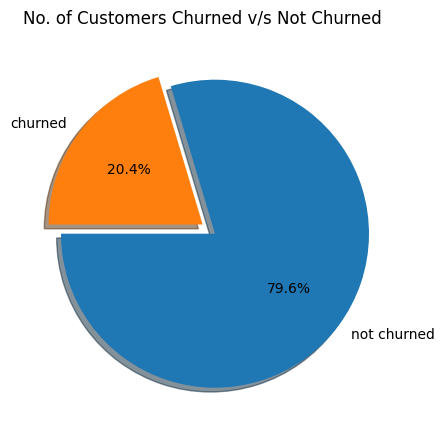

In [12]:
fig = plt.figure(figsize=(5,5)) 
# figsize=(5,5) บงบอกขนาด 5*5 นิ้ว
plt.pie(class_counts, labels=['not churned','churned'],explode=(0.1,0),shadow=True, autopct="%1.1f%%", startangle=180)
# autopct="%1.1f%%" ใส่เพื่อกำหนดเปอร์เซ็น
# startangle=180 ใส่เพื่อเปลี่ยนมุมของกราฟ
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

Dataset now (Insight)
- Many people tend **not churn**
- Our data is imbalanced

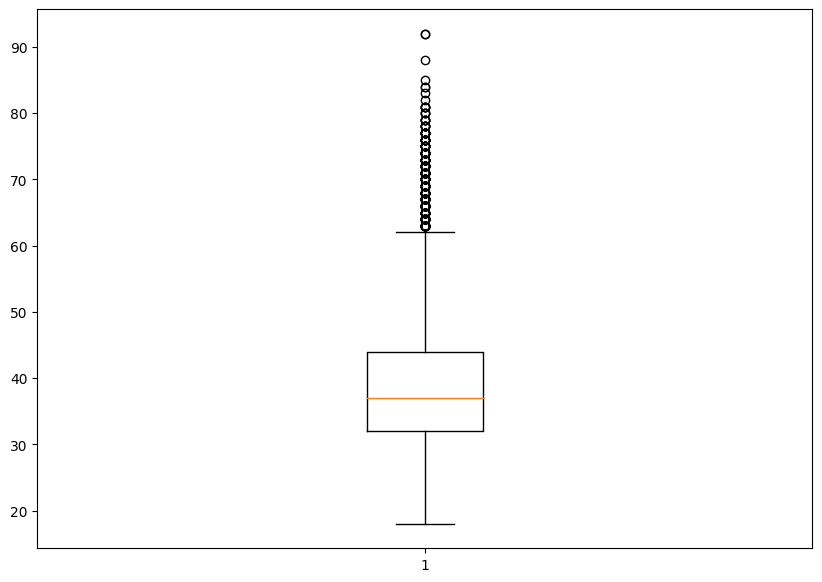

In [13]:
#  dataset
data_age = data['age']
data_age
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data_age)
 
# show plot
plt.show()

<Axes: xlabel='age', ylabel='Count'>

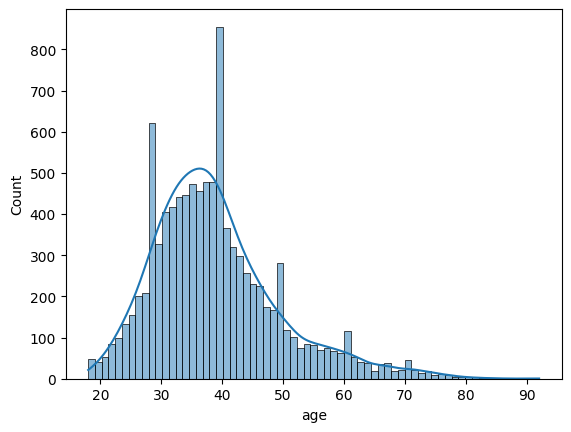

In [14]:
sns.histplot(x=data['age'], data=data, kde=True)
# kde=True = เส้นเเสดงการเเจกเเจงความหน้าเเน่น 

In [15]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Correlation

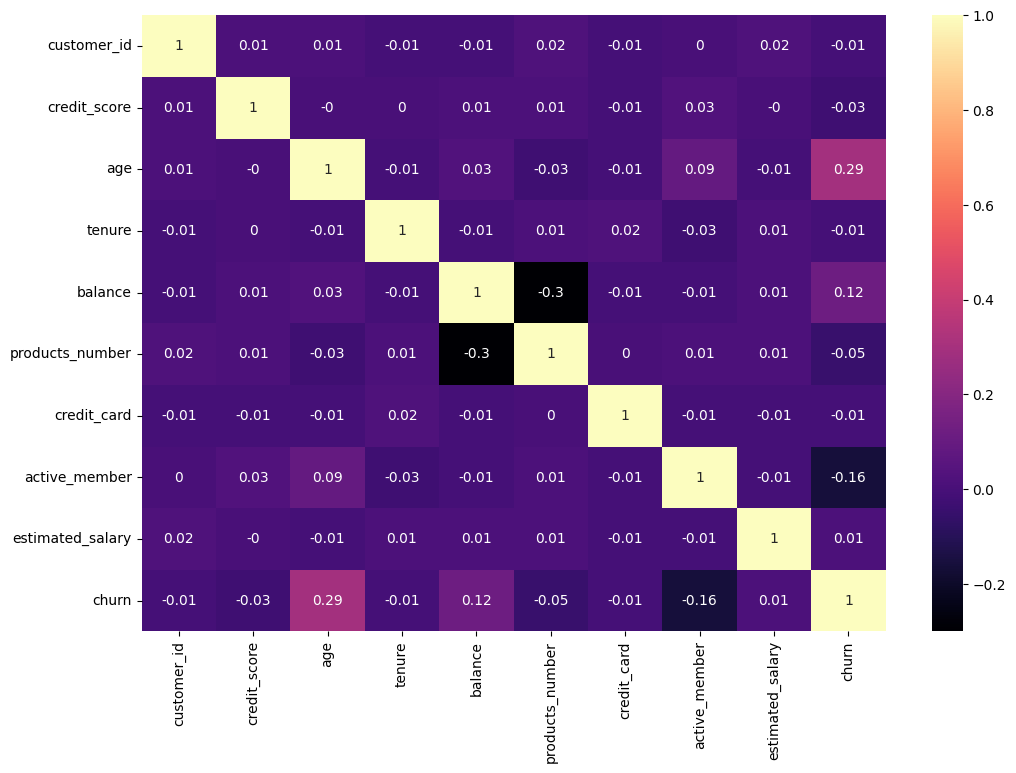

In [16]:
c_map=sns.color_palette("magma", as_cmap=True)
    # c_map color map sns ในตัวอย่างใช้ magma
d_correlation = data.corr(numeric_only=True).round(2)
    # d_correlation บงบอกชุดข้อมูลที่จะนำมาหา cor 
        # numeric_only=True = ตัวเลขเท่านั้น
plt.figure(figsize = (12,8))
    # ขนาด12*8นิ้ว
sns.heatmap(d_correlation, annot = True, cmap = c_map)
plt.show()

In [17]:
print( abs(d_correlation['churn']).sort_values(ascending=False) )
    # abs ช่วยให้ไม่สนค่าลบ
# เเต่ไม่สนไม่ได้เพราะเงั้นจึงไม่ใช้
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("Correlation of Churn")
print('----------------------')
print( d_correlation['churn'].sort_values(ascending=False) )

churn               1.00
age                 0.29
active_member       0.16
balance             0.12
products_number     0.05
credit_score        0.03
customer_id         0.01
tenure              0.01
credit_card         0.01
estimated_salary    0.01
Name: churn, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Correlation of Churn
----------------------
churn               1.00
age                 0.29
balance             0.12
estimated_salary    0.01
customer_id        -0.01
tenure             -0.01
credit_card        -0.01
credit_score       -0.03
products_number    -0.05
active_member      -0.16
Name: churn, dtype: float64


**age balance** is stronger correlation with the column of Churn

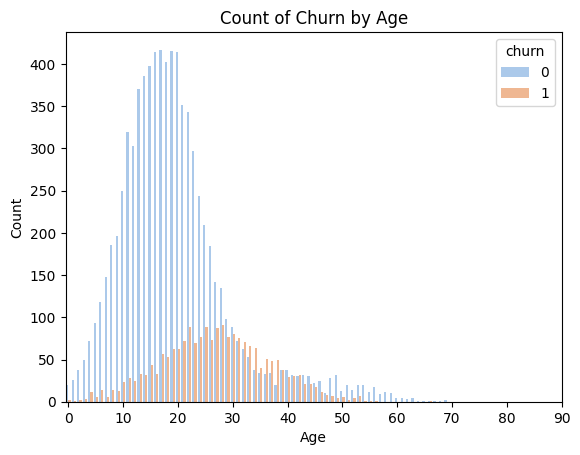

In [18]:
# สร้างกราฟบาร์
sns.countplot(x='age', hue='churn', data=data, palette='pastel')

# เพิ่มรายละเอียด
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Churn by Age')

plt.xticks(range(0, max(data['age'])+1, 10), labels=range(0, max(data['age'])+1, 10))
    # ถ้าไม่มีตัวเลขอายุจะติดกันจนมองไม่เห็น เอาไว้สำหรับดูช่วงอายุ ที่เเท่งกราฟเหมือนเดิม

# แสดงกราฟ
plt.show()

# ML Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.drop('churn',axis=1)
Y = data['churn']


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
print(f'X_train data size: {X_train.shape}')
print(f'Y_train data size: {Y_train.shape} \n')

print(f'X_test data size : {X_test.shape}')
print(f'Y_test data size : {Y_test.shape} \n')

X_train data size: (8000, 11)
Y_train data size: (8000,) 

X_test data size : (2000, 11)
Y_test data size : (2000,) 



In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

ใช้ Chat ช่วย 

# วิธีเช็ค categorical column ถ้ามีจะไม่สามารถทำModel ออกมาได้ตรงๆต้องเเปลงค่า Column นั้นก่อน

In [24]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['country', 'gender']


In [25]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data[['country','gender']]

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
#from sklearn import metrics

In [28]:
# แบ่งข้อมูล
X = data.drop('churn', axis=1)
Y = data['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ระบุคอลัมน์ที่เป็นประเภท categorical
categorical_cols = ['country', 'gender']  # เพิ่มคอลัมน์เพิ่มเติมตามที่ต้องการ

# สร้าง ColumnTransformer ที่มีขั้นตอน One-Hot Encoding สำหรับคอลัมน์ที่เป็น categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# ใช้ ColumnTransformer ในการแปลงข้อมูล
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# train model
model = DecisionTreeRegressor()
model.fit(X_train_encoded, Y_train)

# test model
pred = model.predict(X_test_encoded)

# evaluate model
mae = np.mean(np.absolute(Y_test - pred))
mse = np.mean((Y_test - pred)**2)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.2225
MSE: 0.2225


 ไม่ได้คิดเอง100% โดยเฉพาะกราฟ เดียวมาเเกะโค้ดใหม่ วันนี้ขอนอนก่อน งม Categorical นานมาก

# RandomForestRegressor

In [29]:
from sklearn.metrics import classification_report
# Split Data
X = data.drop('churn', axis=1)
Y = data['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train RandomForestRegressor Model
model = RandomForestRegressor()
model.fit(X_train_encoded, Y_train)

# Test Model
pred = model.predict(X_test_encoded)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report สิ่งที่สำคัญมาก
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Confusion martrix 

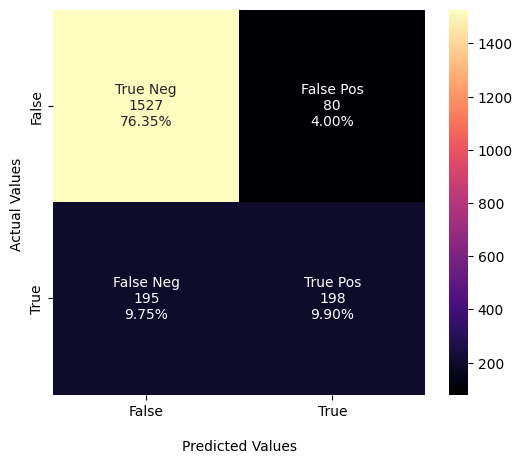

In [30]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=c_map)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Roc curve and AUC

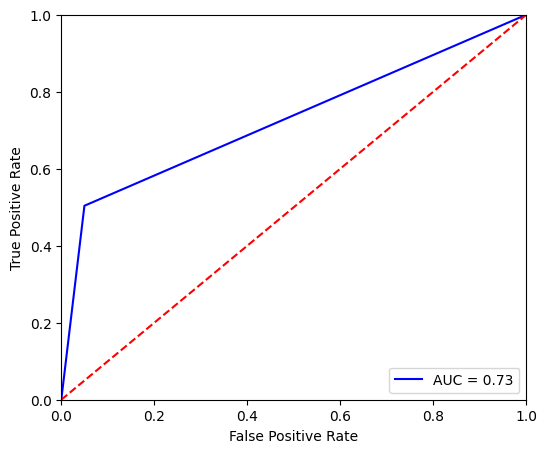

In [31]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.8625
Precision: 0.7122302158273381
Recall: 0.5038167938931297
F1-score: 0.5901639344262295


โมเดลของผมมีความสามารถในการทำนาย Churn ในระดับที่ดี โดยมีค่า Accuracy อยู่ที่ 85.9% และมีค่า F1-score อยู่ที่ 57.4%

ค่า Precision อยู่ที่ 70.6% หมายความว่า โมเดลของคุณทำนายว่าลูกค้าจะเลิกใช้บริการถูกต้อง 70.6% ของเวลาที่โมเดลทำนายว่าลูกค้าจะเลิกใช้บริการ

ค่า Recall อยู่ที่ 48.3% หมายความว่า โมเดลของคุณทำนายว่าลูกค้าจะเลิกใช้บริการถูกต้อง 48.3% ของเวลาที่ลูกค้าจริงเลิกใช้บริการ

ค่า Precision และ Recall อยู่ในระดับที่ใกล้เคียงกัน แสดงว่าโมเดลของคุณไม่มีปัญหาในการแยกแยะระหว่างลูกค้าที่จะเลิกใช้บริการกับลูกค้าที่จะยังคงใช้บริการ

อย่างไรก็ตาม ค่า Recall ต่ำกว่า Precision เล็กน้อย แสดงว่าโมเดลของคุณอาจทำนายว่าลูกค้าจะไม่เลิกใช้บริการบ่อยเกินไป

คุณสามารถนำข้อมูลชุดนี้ไปใช้ในการวางแผนกลยุทธ์เพื่อลดอัตราการยกเลิกใช้บริการของลูกค้าได้ 

เช่น วิเคราห์ว่ากลุ่ม dataset ชุดนี้มีเเน้วโน้มว่าจะเลิกใช่บริการ ต้องสร้างกราฟเพื่อดูว่ามีกลุ่มลูกค้าเเบบในบ้างใน dataset ชุดนี้เช่นช่วงอายุ เเล้วแบ่งข้อมูลลูกค้าตามอายุ และเลือกกลุ่มลูกค้าที่คิดว่ามีค่า Recall ต่ำออก เช่นช่วงอายุ 25-35 ปี จากนั้นเอากลุ่มลูกค้าที่อายุมากกว่านั้นมาทำ ML อีกรอบเพื่อดูค่า Recell เปรียบเทียบ ตัวอย่างเช่น หากคุณแบ่งข้อมูลออกเป็นกลุ่มตามอายุ 4 กลุ่ม คือ 18-25 ปี, 25-35 ปี, 35-45 ปี และ 45 ปีขึ้นไป 

หากคุณพบว่ากลุ่มคนที่มีอายุ 25-35 ปี มีค่า Recall ต่ำที่สุด แสดงว่ากลุ่มนี้อาจเป็นกลุ่มที่มีแนวโน้มที่จะเลิกใช้บริการมากที่สุด
จากนั้น คุณอาจแบ่งข้อมูลลูกค้าในอีก 3 กลุ่มที่เหลือออกเป็นกลุ่มย่อยๆ เพื่อดูว่ากลุ่มย่อยใดที่มีแนวโน้มที่จะเลิกใช้บริการมากที่สุด
ตัวอย่างเช่น หากคุณแบ่งข้อมูลลูกค้าในอีก 3 กลุ่มที่เหลือออกเป็นกลุ่มย่อยๆ ตามรายได้ คุณอาจพบว่ากลุ่มคนที่มีอายุ 35-45 ปี ที่มีรายได้สูง มีค่า Recall ต่ำที่สุด แสดงว่ากลุ่มนี้อาจเป็นกลุ่มที่มีแนวโน้มที่จะเลิกใช้บริการมากที่สุด

การแบ่งข้อมูลลูกค้าออกเป็นกลุ่มย่อยๆ จะช่วยให้คุณเข้าใจถึงแนวโน้มการเลิกใช้บริการของลูกค้าแต่ละกลุ่มได้ดีขึ้น และช่วยให้คุณกำหนดกลยุทธ์ที่เหมาะสมในการลดอัตราการยกเลิกใช้บริการของลูกค้าได้มีประสิทธิภาพมากขึ้น

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split Data
X = data.drop('churn', axis=1)
Y = data['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train DecisionTreeClassifier Model (Changed from RandomForestRegressor)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, Y_train)

# Test Model
pred = model.predict(X_test_encoded)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000

Accuracy: 0.7845
Precision: 0.4579646017699115
Recall: 0.5267175572519084
F1-score: 0.48994082840236686


In [34]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

                        Feature  Importance
7                remainder__age    0.212589
13  remainder__estimated_salary    0.130001
9            remainder__balance    0.129540
6       remainder__credit_score    0.121230
10   remainder__products_number    0.119877
5        remainder__customer_id    0.100470
12     remainder__active_member    0.067551
8             remainder__tenure    0.058538
1          cat__country_Germany    0.020091
11       remainder__credit_card    0.010632
2            cat__country_Spain    0.009125
4              cat__gender_Male    0.007698
0           cat__country_France    0.007220
3            cat__gender_Female    0.005439


# importances

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split Data
X = data.drop('churn', axis=1)
Y = data['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train RandomForestRegressor Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_encoded, Y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

                        Feature  Importance
7                remainder__age    0.216544
9            remainder__balance    0.129636
13  remainder__estimated_salary    0.122472
10   remainder__products_number    0.120488
5        remainder__customer_id    0.116557
6       remainder__credit_score    0.109734
12     remainder__active_member    0.060591
8             remainder__tenure    0.055927
1          cat__country_Germany    0.022132
11       remainder__credit_card    0.011469
4              cat__gender_Male    0.010239
3            cat__gender_Female    0.009103
2            cat__country_Spain    0.008169
0           cat__country_France    0.006937


In [36]:
#import graphviz

# Save tree as dot file
#dot_data = tree.export_graphviz(tree_model, out_file=None) 
#graph = graphviz.Source(dot_data)  
#graph
#https://www.kaggle.com/code/hamelg/python-for-data-29-decision-trees

In [37]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Box Plot

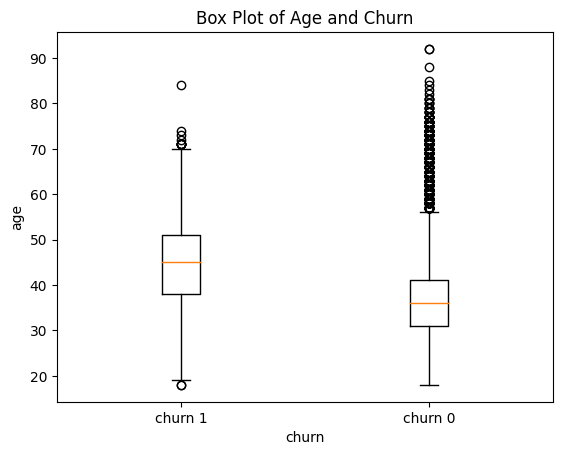

In [38]:
#import matplotlib.pyplot as plt

df = data

# สร้าง box plot
plt.boxplot([df[df['churn'] == 1]['age'], df[df['churn'] == 0]['age']], labels=['churn 1', 'churn 0'])

# เพิ่มป้ายชื่อแกน
plt.xlabel('churn')
plt.ylabel('age')

# เพิ่มหัวตาราง
plt.title('Box Plot of Age and Churn')

# แสดงกราฟ
plt.show()



# violin plot

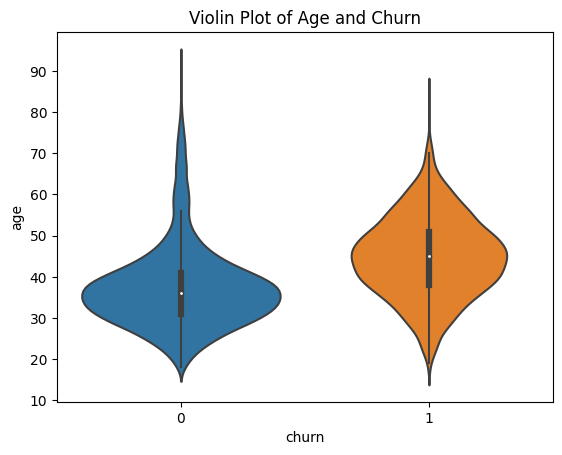

In [39]:
df = pd.DataFrame(data)

# สร้าง violin plot
sns.violinplot(x='churn', y='age', data=df)

# เพิ่มหัวตาราง
plt.title('Violin Plot of Age and Churn')

# แสดงกราฟ
plt.show()

# ลองใช้ for loop ง่ายๆสร้างกราฟ **Box Plot**

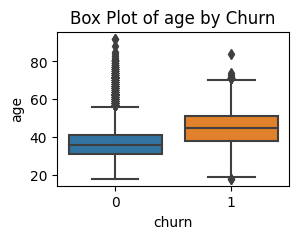

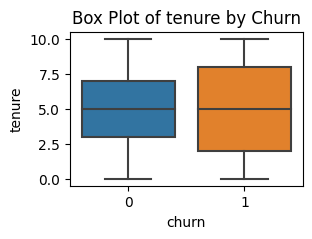

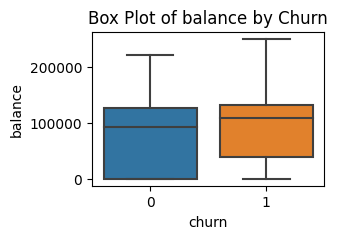

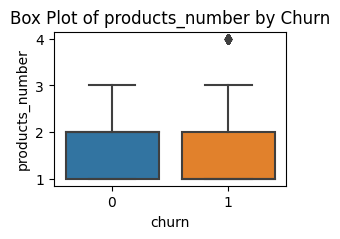

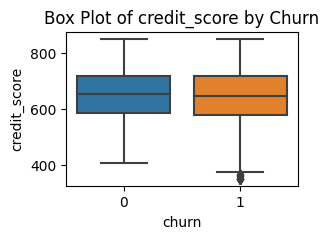

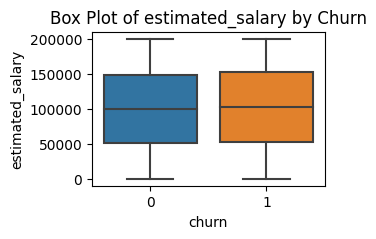

In [40]:
# ตัวแปรที่ต้องการทำ Box Plot
numeric_vars = ['age', 'tenure', 'balance', 'products_number', 'credit_score', 'estimated_salary']

# สร้าง Box Plot สำหรับแต่ละตัวแปร
for var in numeric_vars:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x='churn', y=var, data=df)
    plt.title(f'Box Plot of {var} by Churn')
    plt.show()

# ลองสร้าง For loop สำหรับสร้างกราฟง่ายๆ ด้วย **violin plot**

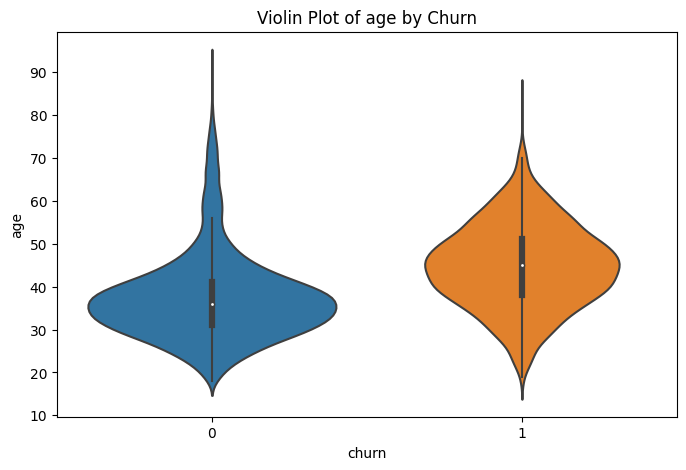

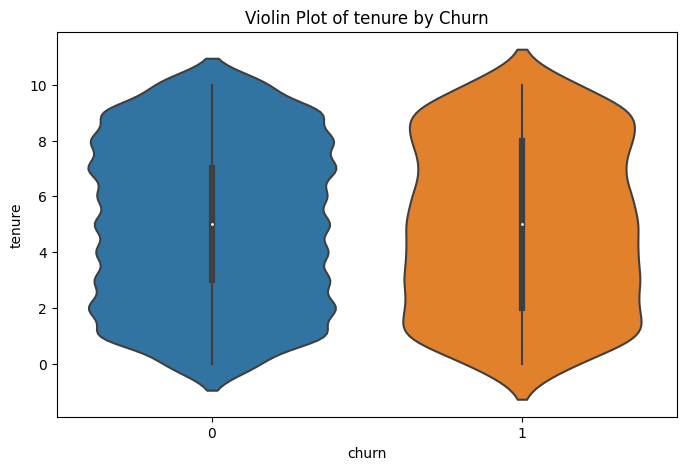

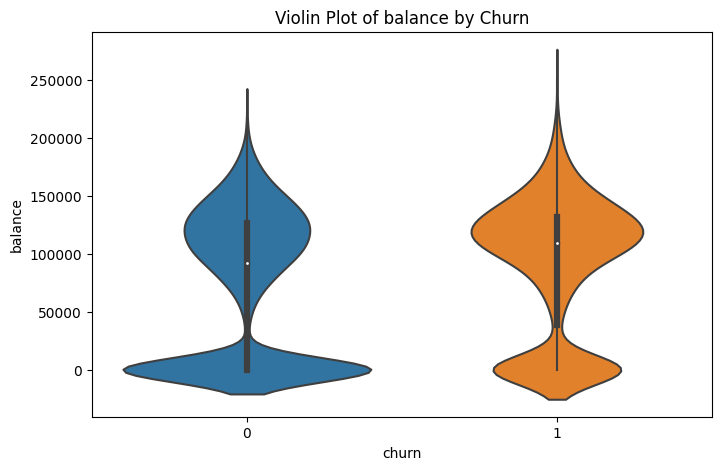

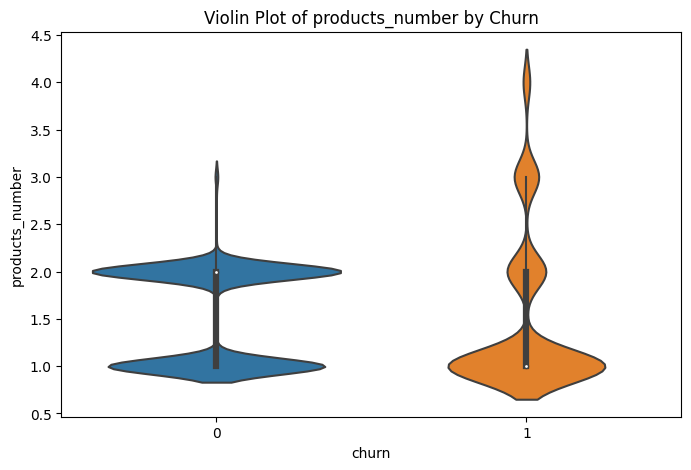

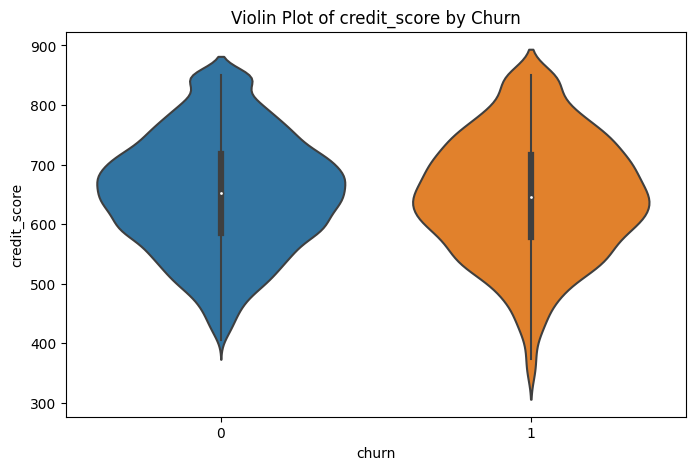

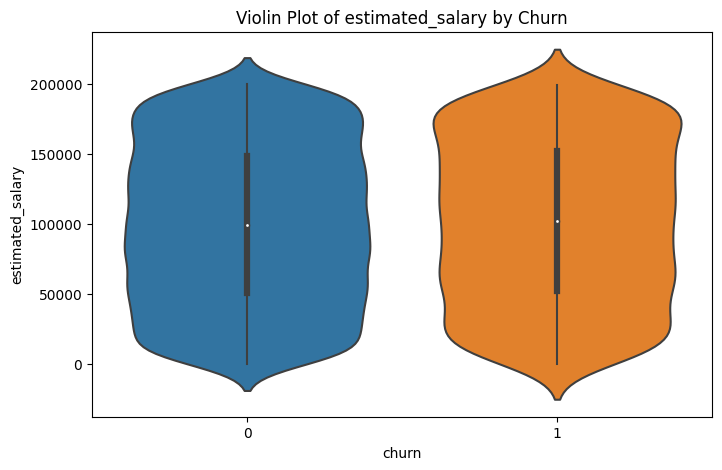

In [41]:
# ตัวแปรที่ต้องการทำ violin plot
numeric_vars = ['age', 'tenure', 'balance', 'products_number', 'credit_score', 'estimated_salary']

# สร้าง violin plot สำหรับแต่ละตัวแปร
for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='churn', y=var, data=df)
    plt.title(f'Violin Plot of {var} by Churn')
    plt.show()

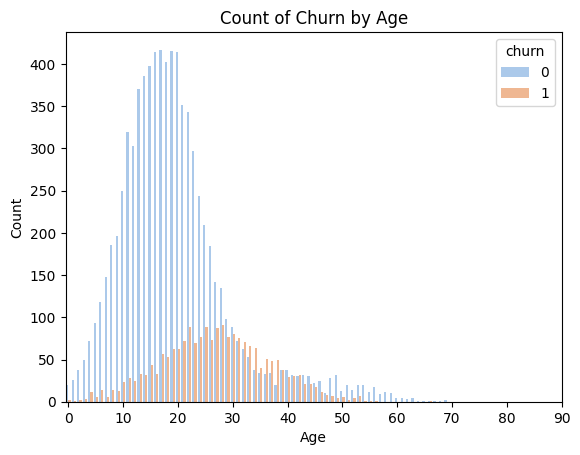

In [42]:
# สร้างกราฟบาร์
sns.countplot(x='age', hue='churn', data=data, palette='pastel')

# เพิ่มรายละเอียด
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Churn by Age')

plt.xticks(range(0, max(data['age'])+1, 10), labels=range(0, max(data['age'])+1, 10))
    # ถ้าไม่มีตัวเลขอายุจะติดกันจนมองไม่เห็น เอาไว้สำหรับดูช่วงอายุ ที่เเท่งกราฟเหมือนเดิม

# แสดงกราฟ
plt.show()

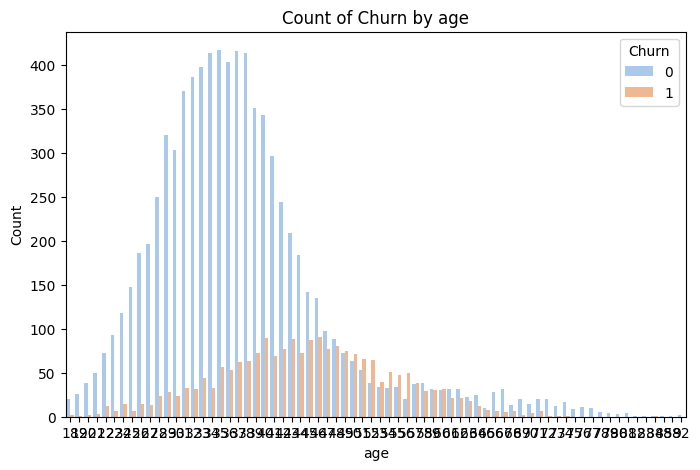

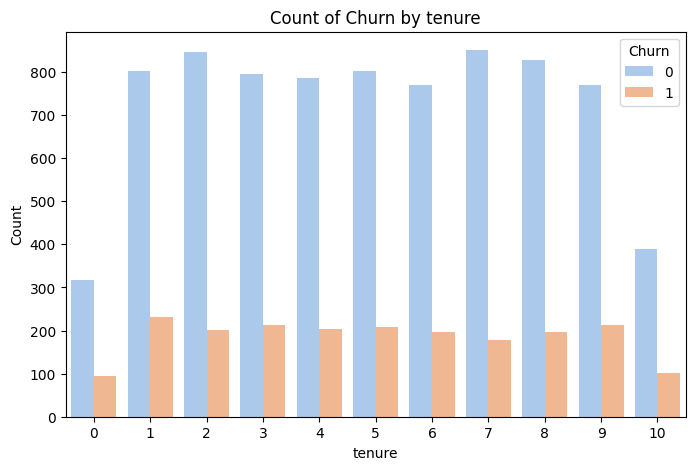

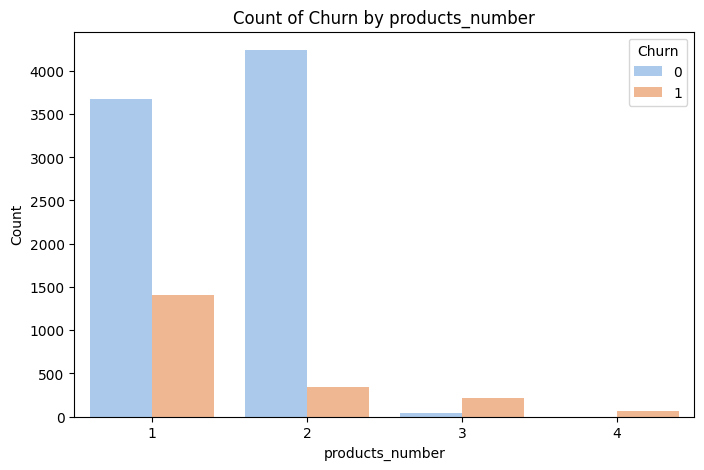

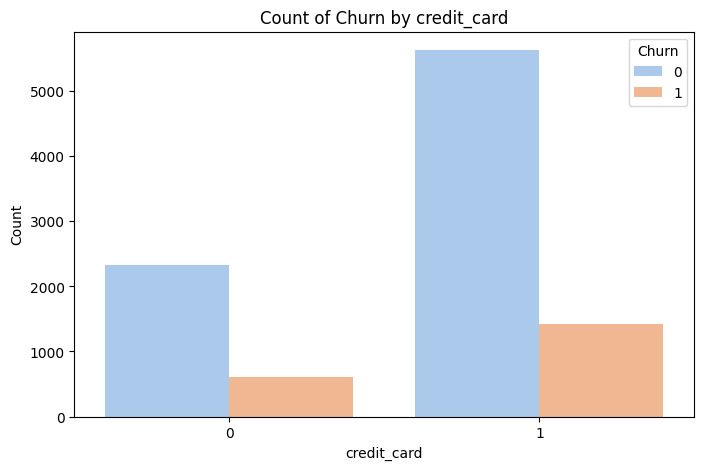

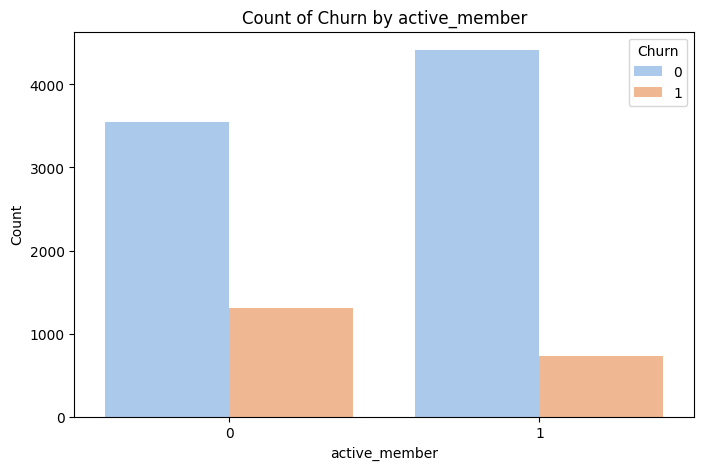

In [43]:
# ลิสต์ของตัวแปรที่ต้องการสร้างกราฟ
variables_to_plot = ['age', 'tenure', 'products_number', 'credit_card', 'active_member']

# สร้างกราฟสำหรับแต่ละตัวแปร
for variable in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=variable, hue='churn', data=df, palette='pastel')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Count of Churn by {variable}')
    plt.legend(title='Churn', loc='upper right')
        # กรอบเล็กๆบนขวา
    plt.show()

In [44]:
data.head(5)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ตัวแปรที่น่าสนใจ คือ 'age', 'product_number' ที่2 ,3 ,4 เพราะว่า 2 กราฟห่างกันมาก ส่วน 3 ,4  churn1 > churn0

จะลองเเบ่งข้อมุลออกเป็น2 ชุด เเบ่งด้วยช่วงอายุ เเบ่งเพราะ Recall ต่ำ

In [57]:
data_l_30 = data[data['age']<30]
data_h_30to50 = data[(data['age']>=30) & (data['age']<50)]
data_h_50 = data[data['age']>50]
print("data<30",data_l_30.shape)
print('data>30',data_h_30.shape)
print('data>50',data_h_50.shape)

data<30 (1641, 12)
data>30 (8359, 12)
data>50 (1261, 12)


In [51]:
data_l_30.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
11,15737173,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0


# Data_age<30

In [53]:
# Split Data
X = data_l_30.drop('churn', axis=1)
Y = data_l_30['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train DecisionTreeClassifier Model (Changed from RandomForestRegressor)
model = RandomForestRegressor()
model.fit(X_train_encoded, Y_train)

# Test Model
pred = model.predict(X_test_encoded)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.94      1.00      0.96       304
           1       0.80      0.16      0.27        25

    accuracy                           0.93       329
   macro avg       0.87      0.58      0.62       329
weighted avg       0.92      0.93      0.91       329

Accuracy: 0.9331306990881459
Precision: 0.8
Recall: 0.16
F1-score: 0.26666666666666666


ควรพิจารณาข้อมูลชุดที่ data_age<30 เพราะค่า recall ต่ำมาก ดูสาเหตุว่าทำไมถึงเป็นเช่นนั้น

# data_age>30to50

In [58]:
# Split Data
X = data_h_30.drop('churn', axis=1)
Y = data_h_30['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train DecisionTreeClassifier Model (Changed from RandomForestRegressor)
model = RandomForestRegressor()
model.fit(X_train_encoded, Y_train)

# Test Model
pred = model.predict(X_test_encoded)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1295
           1       0.75      0.50      0.60       377

    accuracy                           0.85      1672
   macro avg       0.81      0.73      0.75      1672
weighted avg       0.84      0.85      0.84      1672

Accuracy: 0.8492822966507177
Precision: 0.7450980392156863
Recall: 0.5039787798408488
F1-score: 0.6012658227848102


data_age<50

In [59]:
# Split Data
X = data_h_50.drop('churn', axis=1)
Y = data_h_50['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Specify Categorical Columns
categorical_cols = ['country', 'gender']

# Create ColumnTransformer with One-Hot Encoding for Categorical Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Use ColumnTransformer to transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train DecisionTreeClassifier Model (Changed from RandomForestRegressor)
model = RandomForestRegressor()
model.fit(X_train_encoded, Y_train)

# Test Model
pred = model.predict(X_test_encoded)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       127
           1       0.80      0.80      0.80       126

    accuracy                           0.80       253
   macro avg       0.80      0.80      0.80       253
weighted avg       0.80      0.80      0.80       253

Accuracy: 0.8023715415019763
Precision: 0.8015873015873016
Recall: 0.8015873015873016
F1-score: 0.8015873015873016
